#### 1. Importing Necessary Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import sklearn
import scipy
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
!pip3 install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 2. Importing the Dataset

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/My Drive/Nalaiyathiran/weather.csv')

#### 3. Analyse the data

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

#### 3. Analyse the data

In [8]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [9]:
import missingno as msno

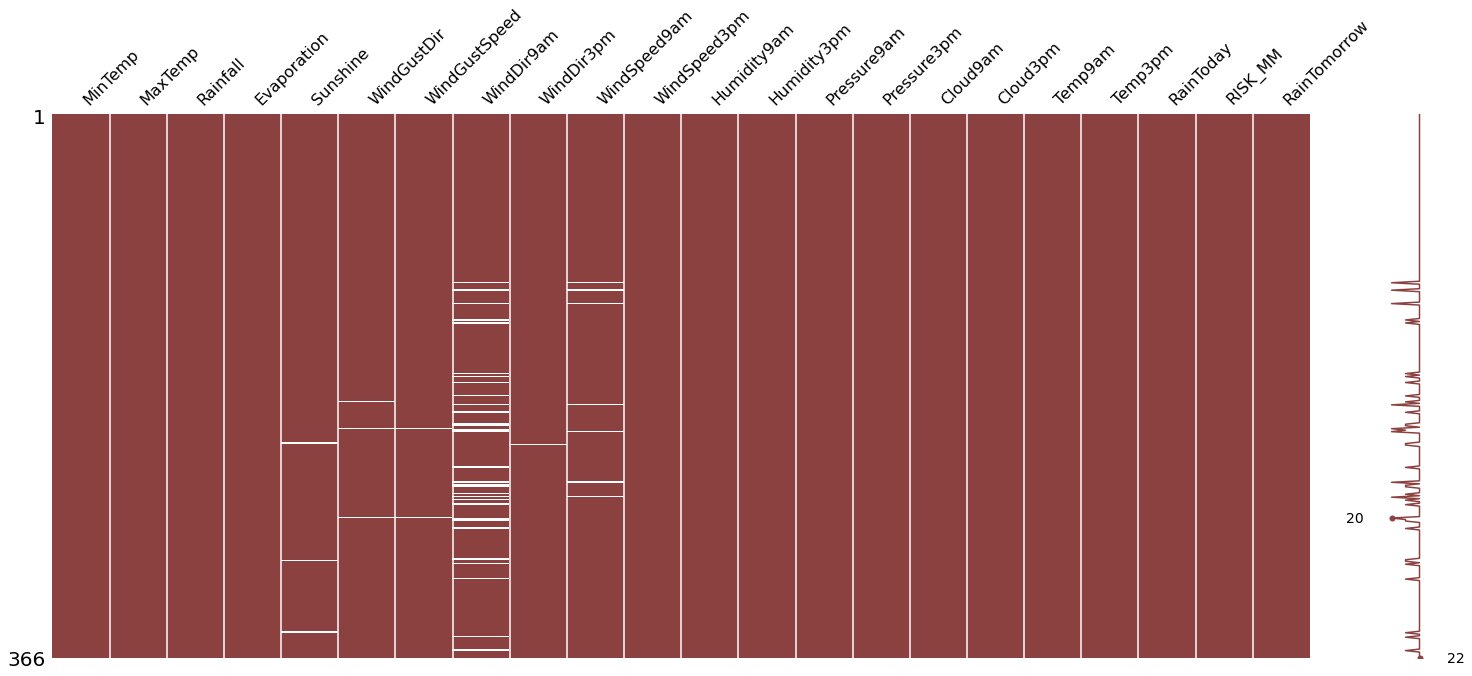

In [10]:

msno.matrix(data,color=(0.55,0.255,0.255),fontsize=16)

In [11]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]

In [12]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [13]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [14]:
c_names=data_c.columns

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [17]:
data_c=imp_mode.fit_transform(data_c)

In [18]:
data_c=pd.DataFrame(data_c,columns=c_names)

In [19]:
data_c.tail()

,RainToday,WindGustDir,WindDir9am,WindDir3pm
361,No,NNW,SSE,NW
362,No,N,NNW,NNW
363,No,ESE,ENE,ENE
364,No,NW,SSW,WNW
365,No,NW,NW,WNW


In [20]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No


In [21]:
data=pd.concat([data,data_c],axis=1)

In [22]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0.0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,Yes,No,NW,SW,NW
1,14.0,26.9,3.6,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,Yes,Yes,ENE,E,W
2,13.7,23.4,3.6,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,Yes,Yes,NW,N,NNE
3,13.3,15.5,39.8,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,Yes,Yes,NW,WNW,W
4,7.6,16.1,2.8,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,No,Yes,SSE,SSE,ESE


#### 5. Data Visualization

In [23]:
corr=data.corr()

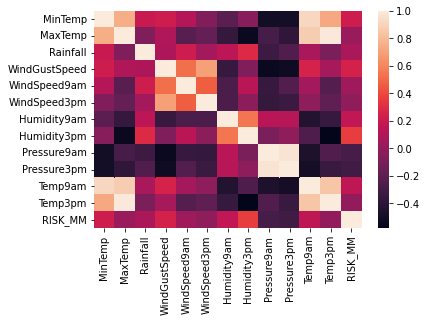

In [24]:
sb.heatmap(data=corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)


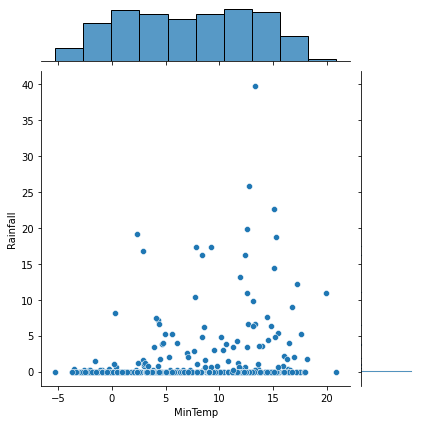

In [25]:
sb.jointplot(data["MinTemp"],data['Rainfall'])

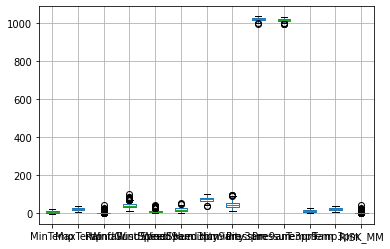

In [26]:
data.boxplot()

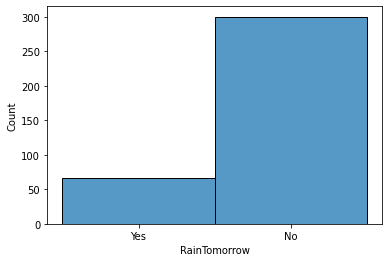

In [27]:
sb.histplot(data['RainTomorrow'])

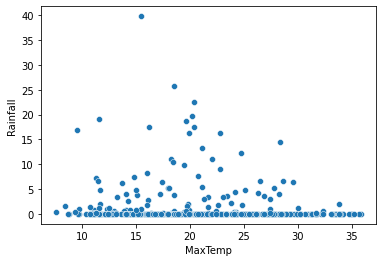

In [28]:
sb.scatterplot(data['MaxTemp'],data['Rainfall'])

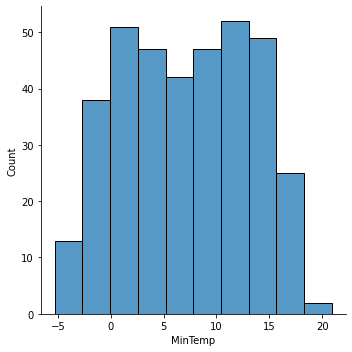

In [29]:
sb.displot(data['MinTemp'])

#### 6. Splitting The Dateset Into Dependent And Independent Variable

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
data = data[data['RainTomorrow'].notnull()]

In [32]:
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)

In [33]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [34]:
set(y)

{'No', 'Yes'}

In [35]:
{'No', 'Yes'}

{'No', 'Yes'}

In [36]:
names=x.columns

In [37]:
names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [38]:
sc=StandardScaler()

In [39]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [40]:
print(len(x),len(y))

366 366


#### 7. Label Encoding

In [41]:
## RainToday	WindGustDir	WindDir9am	WindDir3pm

LE = LabelEncoder()
x['Rainfall'] = LE.fit_transform(x['Rainfall'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,8.0,24.3,0,30.0,6.0,20,68,29,1019.7,1015.0,14.4,23.6,3.6,0,7,12,7
1,14.0,26.9,16,39.0,4.0,17,80,36,1012.4,1008.4,17.5,25.7,3.6,1,1,0,13
2,13.7,23.4,16,85.0,6.0,6,82,69,1009.5,1007.2,15.4,20.2,39.8,1,7,3,5
3,13.3,15.5,46,54.0,30.0,24,62,56,1005.5,1007.0,13.5,14.1,2.8,1,7,14,13
4,7.6,16.1,13,50.0,20.0,28,68,49,1018.3,1018.5,11.1,15.4,0.0,1,10,10,2


In [42]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)

In [43]:
print(len(x),len(y))

366 366


In [44]:
sc=StandardScaler()

In [45]:
x=sc.fit_transform(x)

In [46]:
x[:5]

array([[ 1.22047135e-01,  5.61221296e-01, -4.35226892e-01,
        -7.56614508e-01, -4.64338593e-01,  2.27663829e-01,
        -3.07606422e-01, -9.22225313e-01, -1.35035156e-03,
        -2.80219884e-01,  3.63059084e-01,  6.58867279e-01,
         5.14590764e-01, -4.69041576e-01,  1.57759793e-01,
         1.27317675e+00, -1.21658053e-01],
       [ 1.11912864e+00,  9.50363081e-01,  1.15373114e+00,
        -6.46354102e-02, -7.18644550e-01, -1.11515119e-01,
         6.07090535e-01, -5.06249740e-01, -1.09464408e+00,
        -1.30180025e+00,  9.14353031e-01,  9.75548781e-01,
         5.14590764e-01,  2.13200716e+00, -1.23917773e+00,
        -1.90578418e+00,  1.20092158e+00],
       [ 1.06927456e+00,  4.26518370e-01,  1.15373114e+00,
         3.47214664e+00, -4.64338593e-01, -1.35517126e+00,
         7.59540028e-01,  1.45477796e+00, -1.52896624e+00,
        -1.48754214e+00,  5.40895841e-01,  1.46144846e-01,
         9.09274370e+00,  2.13200716e+00,  1.57759793e-01,
        -1.11104395e+00, -5.6

In [47]:
x=pd.DataFrame(x,columns=names)

#### 8. Splitting The Data Into Train And Test

In [48]:
from sklearn import model_selection

In [49]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

# Build the Model

### 9. Training And Testing The Model

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,classification_report,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
# create a regressor object
dtregressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
dtregressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [52]:
# predicting with regression model with X and Y
y_train_pred=dtregressor.predict(x_train)
y_test_pred=dtregressor.predict(x_test)

In [53]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 0.0 0.0
(1.0, 1.0)


In [54]:
acc=[]
model=[]

In [55]:
#Accuracy Score
model.append('Decision Tree')
acc.append(dtregressor.score(x_test,y_test))
print(dtregressor.score(x_test,y_test))

1.0


## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression  

In [57]:
# create a regressor object
lregressor= LinearRegression()  

# fit the regressor with X and Y data
lregressor.fit(x_train, y_train) 

LinearRegression()

In [58]:
# predicting with regression model with X and Y
y_train_pred=lregressor.predict(x_train)
y_test_pred=lregressor.predict(x_test)

In [59]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 0.06624289712730357 0.058019336840292875
(0.5541063882006465, 0.14039428992976688)


In [60]:
#Accuracy Score
model.append('Linear Regression')
acc.append(lregressor.score(x_test,y_test))
print(lregressor.score(x_test,y_test))

0.5993519690574479


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
# create a regressor object
forest=RandomForestRegressor()

# fit the regressor with X and Y data
forest.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
# predicting with regression model with X and Y
y_train_pred=forest.predict(x_train)
y_test_pred=forest.predict(x_test)

In [64]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 8.424657534246575e-05 0.0001689189189189189
(0.9994329201863109, 0.9988111274868482)


In [65]:
#Accuracy Score
model.append('Random Forest')
acc.append(forest.score(x_test,y_test))
print(forest.score(x_test,y_test))

0.9988335435056747


In [66]:
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()

In [67]:
np.any(np.isnan(x))

False

In [68]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [69]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
p1=RFC.predict(x_train)

In [94]:
p2=RFC.predict(x_test)

## XGBOOST

In [70]:
from xgboost import XGBRegressor

In [79]:
# create a regressor object
xgb = XGBRegressor()

# fit the regressor with X and Y data
xgb.fit(x_train,y_train)

[07:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [80]:
# predicting with regression model with X and Y
y_train_pred=xgb.predict(x_train)
y_test_pred=xgb.predict(x_test)

In [81]:
#Mean Squared Error and r2 Score
print("MSE",mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred))
print((r2_score(y_train,y_train_pred),(r2_score(y_test_pred,y_test))))

MSE 3.1535902382624065e-09 3.0907381518983512e-09
(0.9999999787725808, 0.9999999786509985)


In [82]:
#Accuracy Score
model.append('XGB Boost')
acc.append(xgb.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.9999999786571474


In [91]:
p1=RFC.predict(x_train)

### 10. Model Evaluation

In [83]:
import sklearn.metrics as metrics

In [84]:
data={'Algorithms':model,'Accuracy':acc}
AC=pd.DataFrame(data)
AC

,Algorithms,Accuracy
0,Decision Tree,1.000000
1,Linear Regression,0.599352
2,Random Forest,0.998834
3,XGB Boost,1.000000


In [86]:
import matplotlib.pyplot as plt

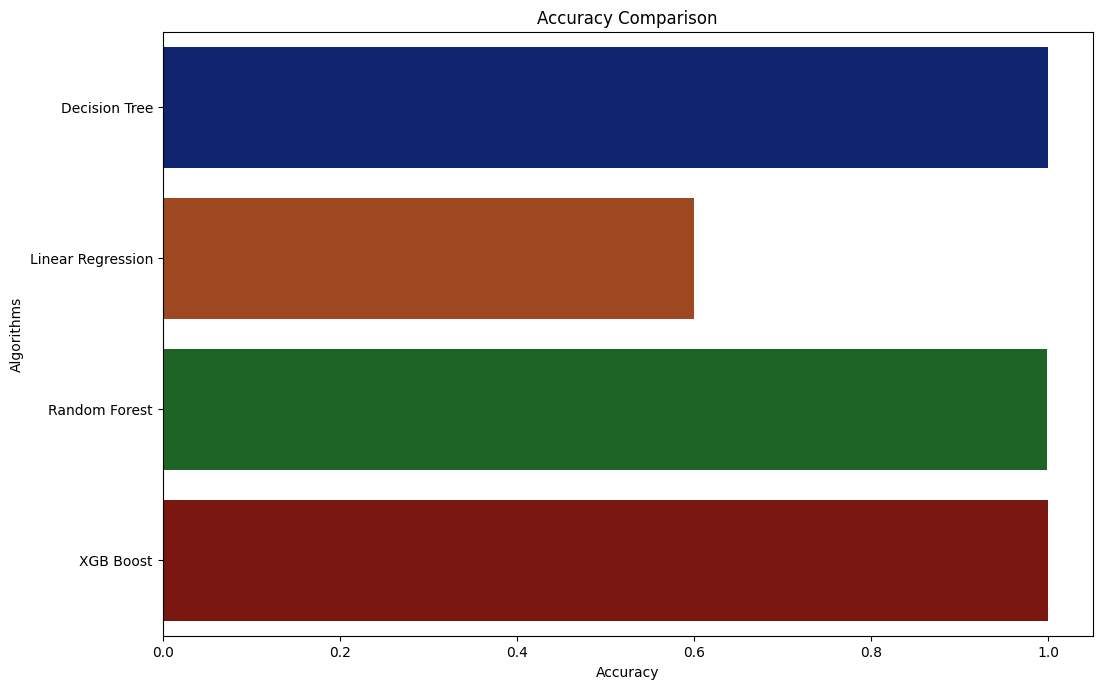

In [89]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x=acc,y=model,palette='dark')

In [95]:
print(metrics.accuracy_score(y_train,p1))

1.0


In [96]:
print(metrics.accuracy_score(y_test,p2))

1.0


11. Save The Model

In [97]:
import pickle

In [101]:
import pickle
file_name='/content/drive/My Drive/Nalaiyathiran/weather.csv.pkl'
pkl=open(file_name,'wb')
pickle.dump(xgb,pkl)
pkl.close()

In [102]:
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))